In [3]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt

df = pd.read_csv('data_science_job.csv')
df.head()

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,training_hours,target
0,8949,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,20.0,NaN,NaN,36.0,1.0
1,29725,city_40,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15.0,50-99,Pvt Ltd,47.0,0.0
2,11561,city_21,0.624,NaN,No relevent experience,Full time course,Graduate,STEM,5.0,NaN,NaN,83.0,0.0
3,33241,city_115,0.789,NaN,No relevent experience,NaN,Graduate,Business Degree,0.0,NaN,Pvt Ltd,52.0,1.0
4,666,city_162,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,20.0,50-99,Funded Startup,8.0,0.0


In [2]:
# complete case analysis is only for values which are missing completely at random:

In [4]:
# how much data is missing (%):
df.isnull().mean() * 100

enrollee_id                0.000000
city                       0.000000
city_development_index     2.500261
gender                    23.530640
relevent_experience        0.000000
enrolled_university        2.014824
education_level            2.401086
major_discipline          14.683161
experience                 0.339284
company_size              30.994885
company_type              32.049274
training_hours             3.998330
target                     0.000000
dtype: float64

In [5]:
df.shape

(19158, 13)

In [6]:
# we should apply cca on only where data is missing less than 5%:

cols = [var for var in df.columns if df[var].isnull().mean() < 0.05 and df[var].isnull().mean() > 0]
cols

['city_development_index',
 'enrolled_university',
 'education_level',
 'experience',
 'training_hours']

In [8]:
df[cols].sample(5)

,city_development_index,enrolled_university,education_level,experience,training_hours
12679,0.920,no_enrollment,Graduate,0.0,10.0
9228,0.925,Full time course,Graduate,6.0,4.0
18861,0.926,no_enrollment,Graduate,20.0,97.0
1905,0.899,no_enrollment,Masters,16.0,35.0
18740,0.920,no_enrollment,Graduate,18.0,38.0


In [9]:
df['education_level'].value_counts()

education_level
Graduate          11598
Masters            4361
High School        2017
Phd                 414
Primary School      308
Name: count, dtype: int64

In [30]:
# after droping the rows containing missing values we have 89% data remaining:
len(df[cols].dropna()) / len(df) * 100

89.68577095730244

In [11]:
new_df = df[cols].dropna()
df.shape, new_df.shape

((19158, 13), (17182, 5))

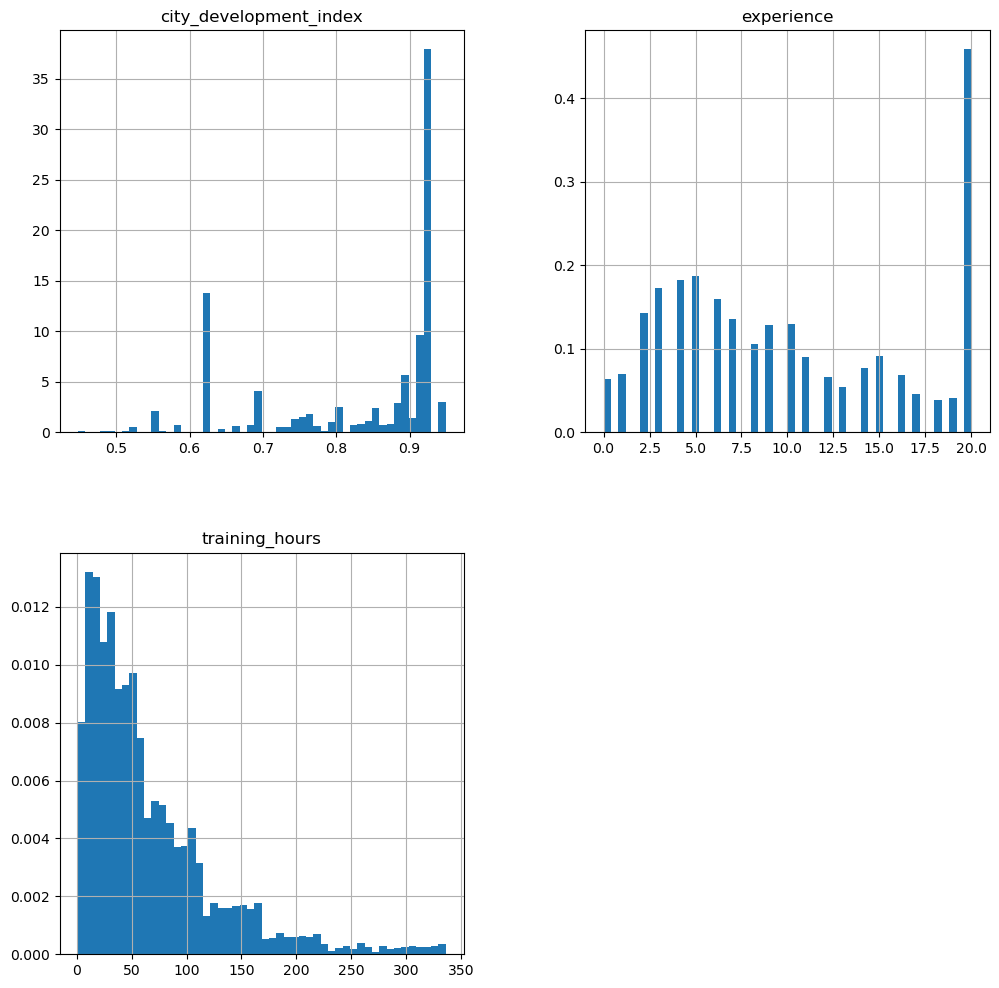

In [12]:
# lets see with graph if there is change in pattern of data due to removing these values:

new_df.hist(bins = 50, density = True, figsize = (12, 12))
plt.show()

<Axes: >

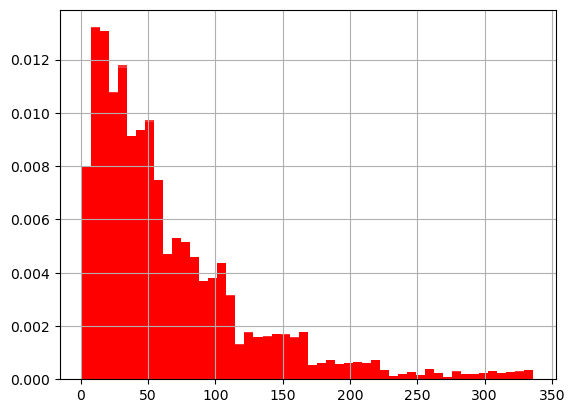

In [13]:
fig = plt.figure()
ax = fig.add_subplot(111)

# original data
df['training_hours'].hist(bins  = 50, ax = ax, density = True, color = 'red')

# data after cca, the argument alpha makes the color transparent, so we can see the overlay of the 2 distributions:
new_df.training_hours.hist(bins = 50, ax = ax, color = 'red', density = True, alpha = 0.8)

# there is not much change as we can see:

<Axes: ylabel='Density'>

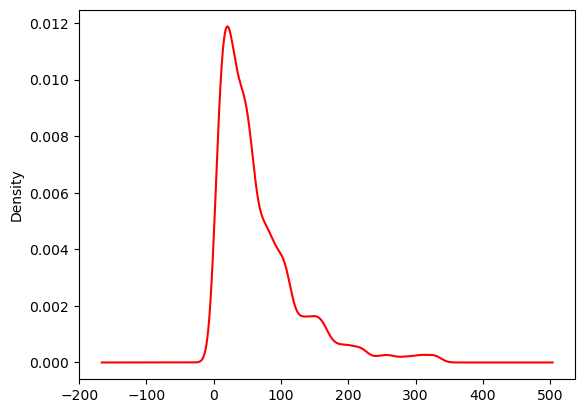

In [14]:
fig = plt.figure()
ax = fig.add_subplot(111)

# original data:
df.training_hours.plot.density(color='red')

<Axes: ylabel='Density'>

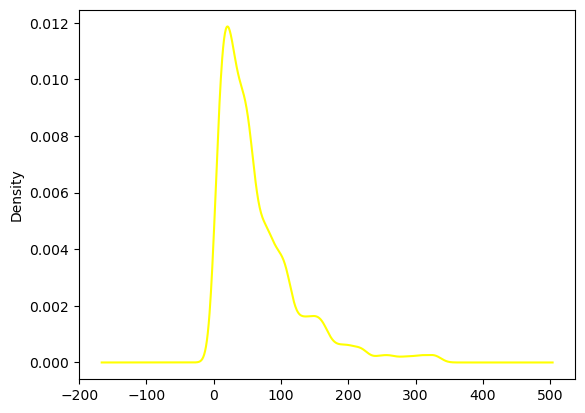

In [29]:
# data after cca:
new_df.training_hours.plot.density(color='yellow')
# no changes at all:

<Axes: >

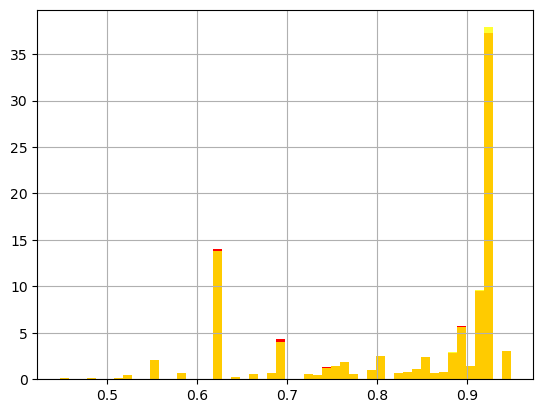

In [28]:
fig = plt.figure()
ax = fig.add_subplot(111)

# original data
df['city_development_index'].hist(bins=50, ax=ax, density=True, color='red')

# data after cca, the argument alpha makes the color transparent, so we can
# see the overlay of the 2 distributions
new_df['city_development_index'].hist(bins=50, ax=ax, color='yellow', density=True, alpha=0.8)

<Axes: ylabel='Density'>

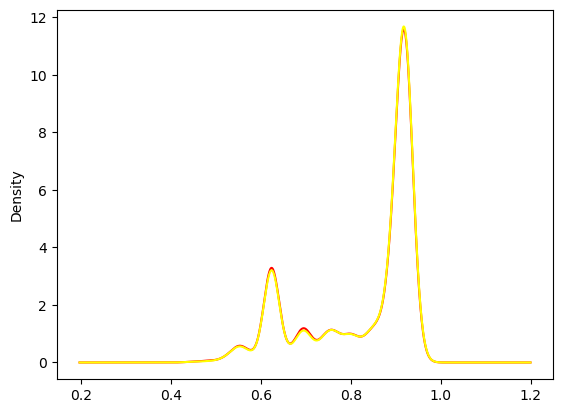

In [27]:
fig = plt.figure()
ax = fig.add_subplot(111)

# original data
df['city_development_index'].plot.density(color='red')

# data after cca
new_df['city_development_index'].plot.density(color='yellow')

<Axes: >

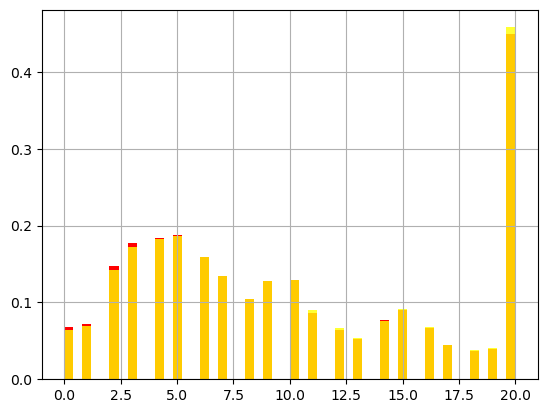

In [26]:
fig = plt.figure()
ax = fig.add_subplot(111)

# original data
df['experience'].hist(bins=50, ax=ax, density=True, color='red')

# data after cca, the argument alpha makes the color transparent, so we can
# see the overlay of the 2 distributions
new_df['experience'].hist(bins=50, ax=ax, color='yellow', density=True, alpha=0.8)

<Axes: ylabel='Density'>

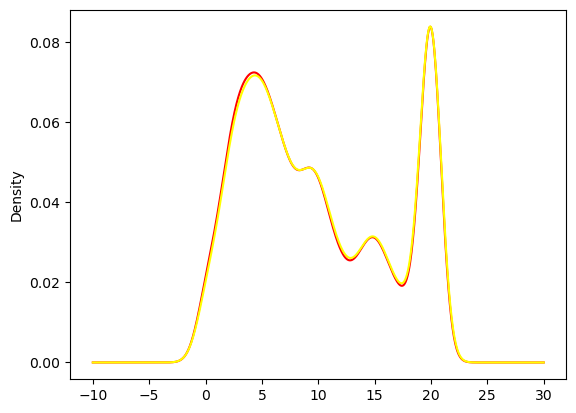

In [25]:
fig = plt.figure()
ax = fig.add_subplot(111)

# original data
df['experience'].plot.density(color='red')

# data after cca
new_df['experience'].plot.density(color='yellow')

In [32]:
temp = pd.concat([
            # percentage of observations per category, original data
            df['enrolled_university'].value_counts() / len(df) * 100,

            # percentage of observations per category, cca data
            new_df['enrolled_university'].value_counts() / len(new_df) * 100
        ],
        axis=1)

# add column names
temp.columns = ['original', 'cca']

temp

,original,cca
enrolled_university,,
no_enrollment,72.121307,73.518799
Full time course,19.610607,20.073333
Part time course,6.253262,6.407869


In [33]:
temp = pd.concat([
            # percentage of observations per category, original data
            df['education_level'].value_counts() / len(df) * 100,

            # percentage of observations per category, cca data
            new_df['education_level'].value_counts() / len(new_df) * 100
        ],
        axis=1)

# add column names
temp.columns = ['original', 'cca']

temp

,original,cca
education_level,,
Graduate,60.538678,61.983471
Masters,22.763336,23.408218
High School,10.528239,10.737982
Phd,2.160977,2.211617
Primary School,1.607683,1.658713
